In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import glob 

## Step 1: PCA analysis 

In [2]:
vcf = open("BYxRM_segs_saccer3.bam.simplified.vcf", "r")

In [3]:
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pca \
  --allow-extra-chr \
  --mind
head plink.eigenvec

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%

In [4]:
eigenvec = open('plink.eigenvec', 'r')

#load PCs into lists
x = []
y = []

for line in eigenvec:
    linesplit = line.split(' ')
    x.append(float(linesplit[2]))
    y.append(float(linesplit[3]))
    

    
    

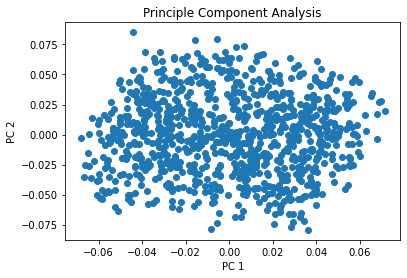

In [81]:
plt.scatter(x, y)
plt.title("Principle Component Analysis")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.savefig("PCA.png")

## Step 2: Plot allele frequencies 

In [6]:
vcf = open("BYxRM_segs_saccer3.bam.simplified.vcf", "r")

#construct list of allele frequencies 
af =[]

for line in vcf:
    #skip header
    if '#' in line:
        pass
    else:
        #split line by tab
        linesplit=line.split("\t")
        
        for field in linesplit:
            if 'AF=' in field: #find allele frequency
                   
                        
                    if ',' not in field: 
                        af.append(float(field[3:]))
                            
                    else:
                        af_split = field.split(',')
                        for z in af_split:
                            if 'AF=' in z:
                                af.append(float(z[3:]))
                            else:
                                af.append(float(z))
                                    
print(af)

[0.690206, 0.710472, 0.565776, 0.503932, 0.712679, 0.713408, 0.695903, 0.493498, 0.496109, 0.5215, 0.529564, 0.524582, 0.518839, 0.522523, 0.519038, 0.540366, 0.536523, 0.528079, 0.52593, 0.522124, 0.530378, 0.515259, 0.536906, 0.525758, 0.528246, 0.530303, 0.527832, 0.519578, 0.537856, 0.532875, 0.530969, 0.534449, 0.531746, 0.542487, 0.533129, 0.538038, 0.519527, 0.533438, 0.532022, 0.533777, 0.53719, 0.531, 0.521161, 0.524465, 0.520813, 0.525077, 0.524341, 0.530969, 0.526367, 0.532321, 0.52997, 0.53656, 0.52704, 0.524823, 0.52071, 0.520854, 0.527944, 0.481481, 0.520098, 0.518868, 0.521973, 0.52359, 0.524029, 0.524898, 0.532325, 0.531414, 0.517734, 0.516256, 0.520568, 0.519704, 0.520588, 0.515764, 0.519763, 0.513444, 0.514028, 0.520876, 0.526052, 0.527641, 0.516333, 0.524327, 0.519677, 0.523303, 0.514811, 0.517188, 0.514736, 0.509585, 0.5143, 0.512, 0.515984, 0.51769, 0.525, 0.516899, 0.518299, 0.531828, 0.520387, 0.524024, 0.524462, 0.521078, 0.517751, 0.526183, 0.521717, 0.530938, 

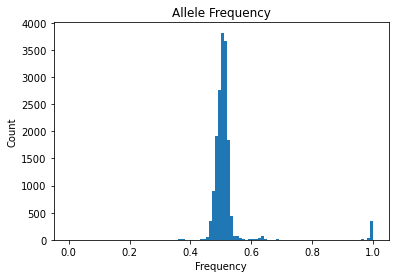

In [80]:
plt.hist(af, bins=100)
plt.title("Allele Frequency")
plt.ylabel("Count")
plt.xlabel("Frequency")

plt.savefig("Allele_freq.png")

## Step 3: Association test

In [8]:
#fixing phenotype data to format amenable to plink (first two columns individual and family ID)
pheno = open('BYxRM_PhenoData.txt', 'r')
pheno_readable = open('BYxRM_PhenoData_fixed.txt', 'w')

for line in pheno:
    if "Cadmium" not in line: #skip header
        line_split = line.split('\t')
        
        if '_' in line_split[0]: #split first column into seperate IDs
            id_split = line_split[0].split('_')
            
        pheno_readable.write(id_split[0]+'\t'+id_split[1]+'\t'+'\t'.join(line_split[1:])) #write to new file
pheno_readable.close()

['A01', '01']
['A01', '02']
['A01', '03']
['A01', '04']
['A01', '05']
['A01', '06']
['A01', '07']
['A01', '08']
['A01', '09']
['A01', '10']
['A01', '11']
['A01', '12']
['A01', '13']
['A01', '14']
['A01', '15']
['A01', '16']
['A01', '17']
['A01', '18']
['A01', '19']
['A01', '20']
['A01', '21']
['A01', '22']
['A01', '23']
['A01', '24']
['A01', '25']
['A01', '26']
['A01', '27']
['A01', '28']
['A01', '29']
['A01', '30']
['A01', '31']
['A01', '32']
['A01', '33']
['A01', '34']
['A01', '35']
['A01', '36']
['A01', '37']
['A01', '38']
['A01', '39']
['A01', '40']
['A01', '41']
['A01', '42']
['A01', '43']
['A01', '44']
['A01', '45']
['A01', '46']
['A01', '47']
['A01', '48']
['A01', '49']
['A01', '50']
['A01', '51']
['A01', '52']
['A01', '53']
['A01', '54']
['A01', '55']
['A01', '56']
['A01', '57']
['A01', '58']
['A01', '59']
['A01', '60']
['A01', '61']
['A01', '62']
['A01', '63']
['A01', '64']
['A01', '65']
['A01', '66']
['A01', '67']
['A01', '69']
['A01', '70']
['A01', '71']
['A01', '72']
['A01'

In [16]:
#testing assocation with all 46 phenotypes
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno BYxRM_PhenoData_fixed.txt \
  --linear \
  --allow-no-sex \
  --all-pheno \
  --covar plink.eigenvec \
  --covar-number 1-10 \
  --allow-extra-chr 

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno BYxRM_PhenoData_fixed.txt
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%

## Step 4: QQ and Manhattan plots

plink.P28.assoc.linear


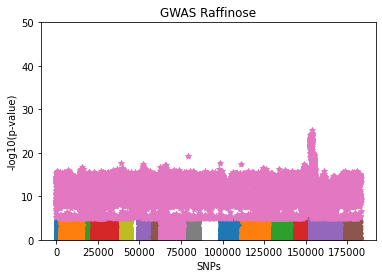

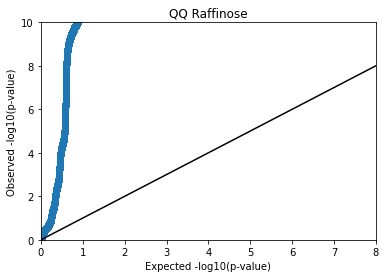

plink.P19.assoc.linear


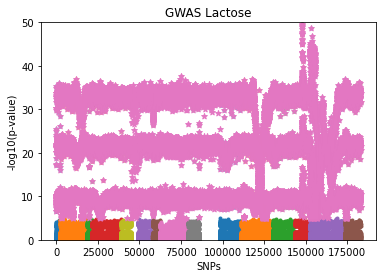

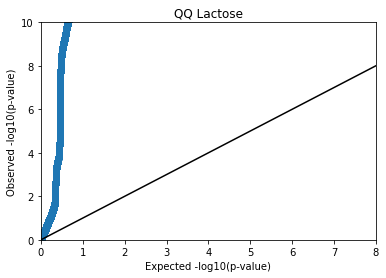

plink.P29.assoc.linear


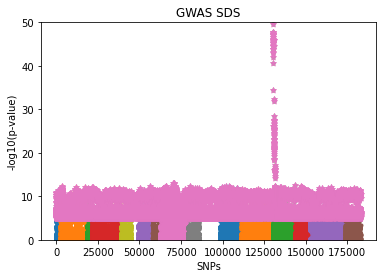

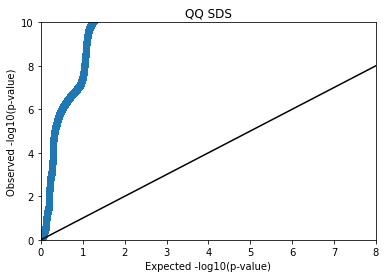

plink.P18.assoc.linear


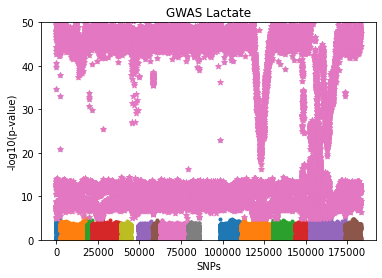

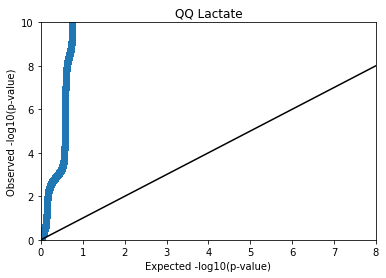

plink.P12.assoc.linear


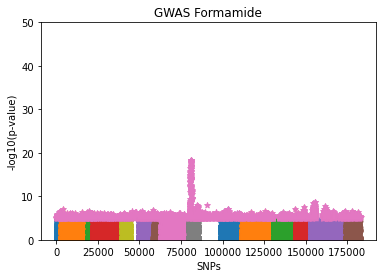

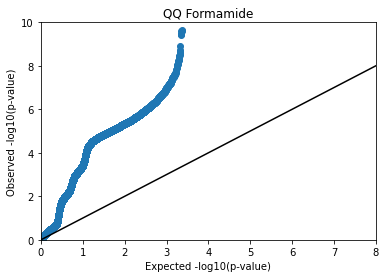

plink.P40.assoc.linear


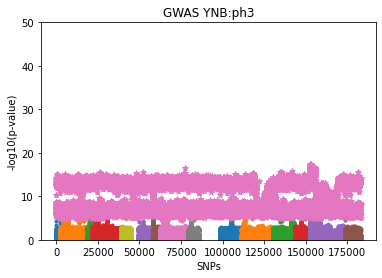

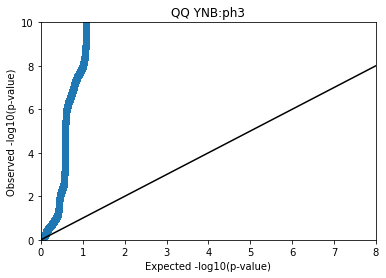

plink.P15.assoc.linear


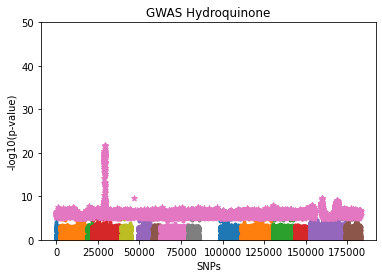

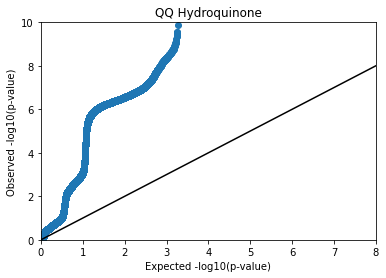

plink.P7.assoc.linear


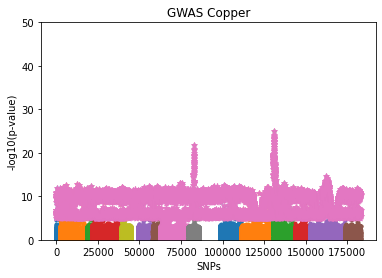

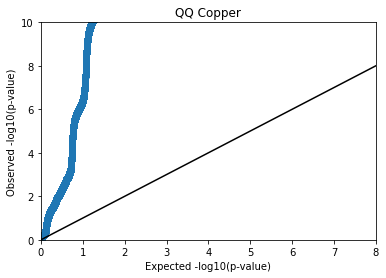

plink.P23.assoc.linear


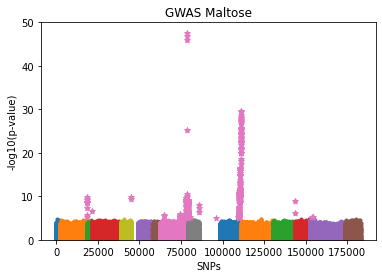

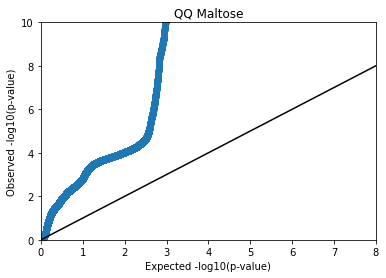

plink.P24.assoc.linear


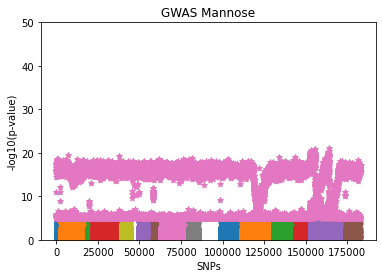

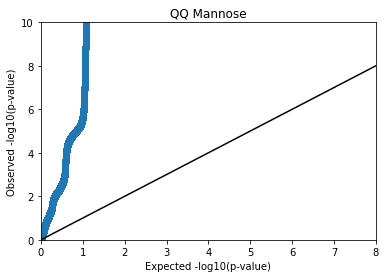

plink.P31.assoc.linear


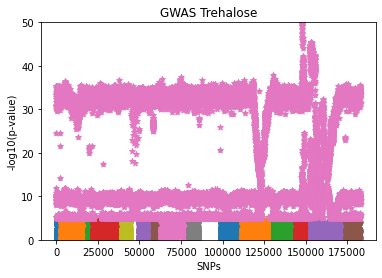

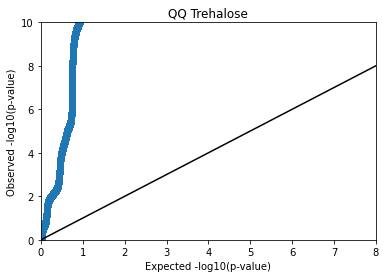

plink.P36.assoc.linear


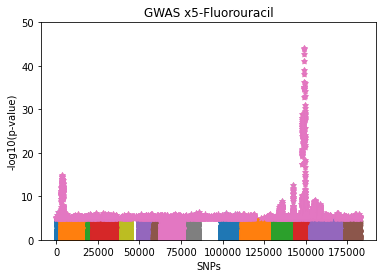

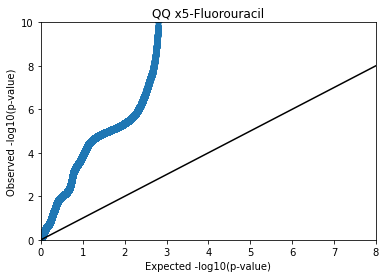

plink.P14.assoc.linear


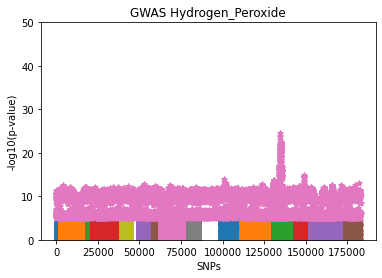

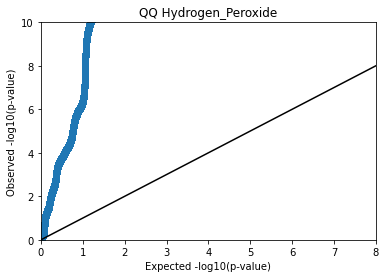

plink.P41.assoc.linear


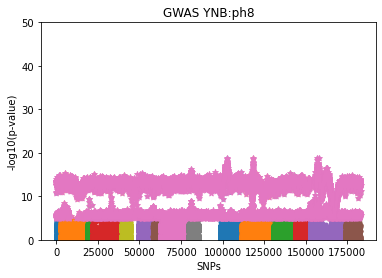

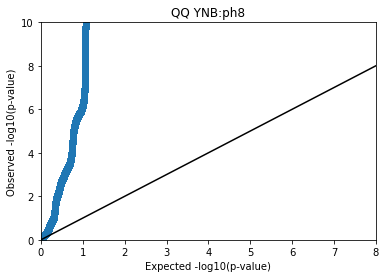

plink.P13.assoc.linear


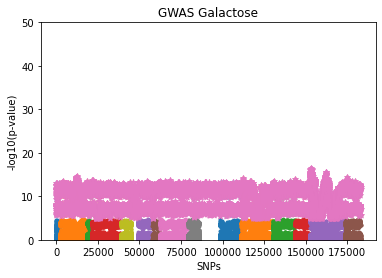

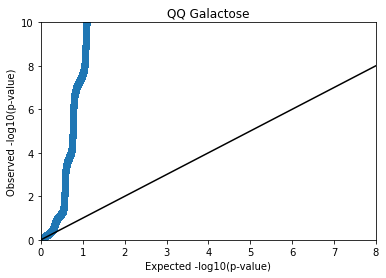

plink.P46.assoc.linear


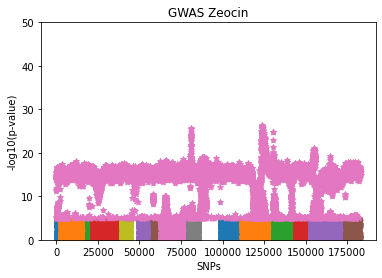

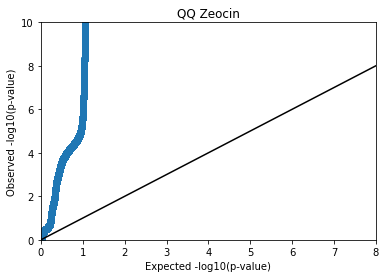

plink.P6.assoc.linear


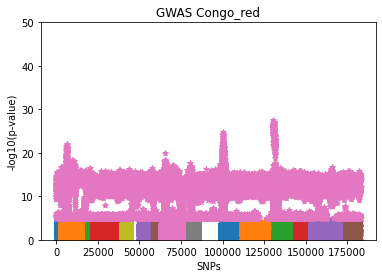

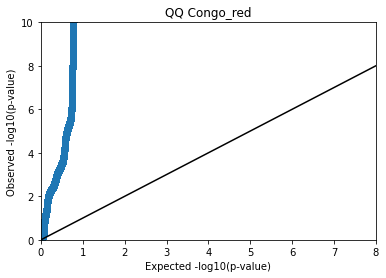

plink.P1.assoc.linear


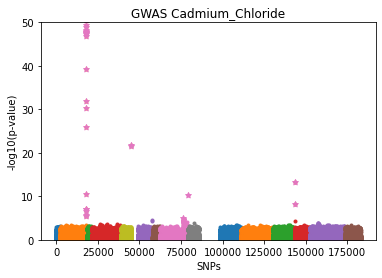

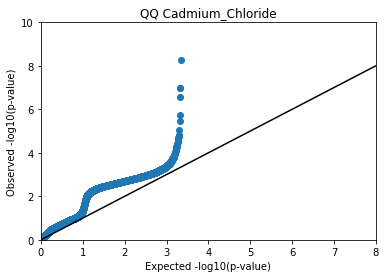

plink.P37.assoc.linear


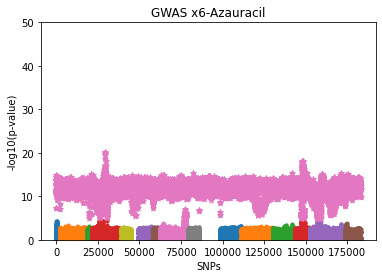

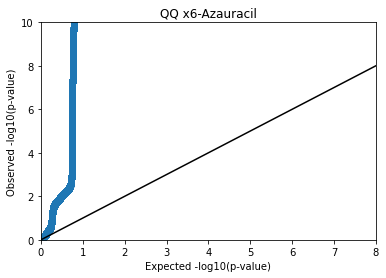

plink.P30.assoc.linear


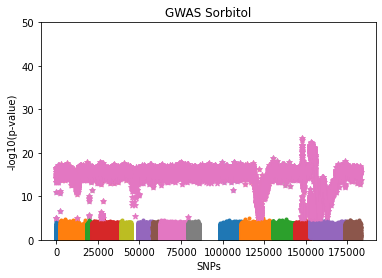

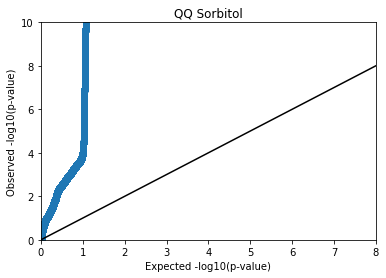

plink.P25.assoc.linear


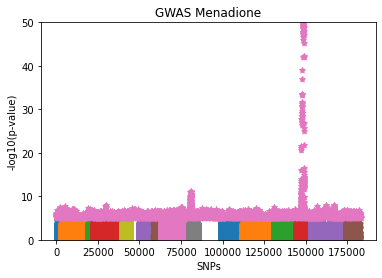

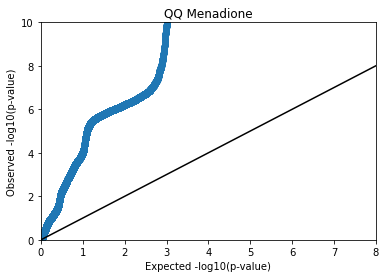

plink.P22.assoc.linear


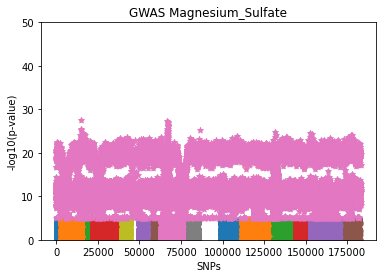

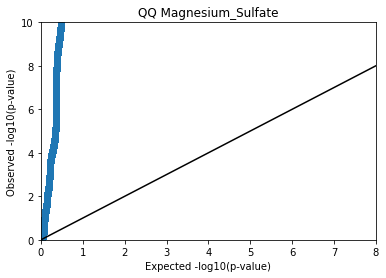

plink.P3.assoc.linear


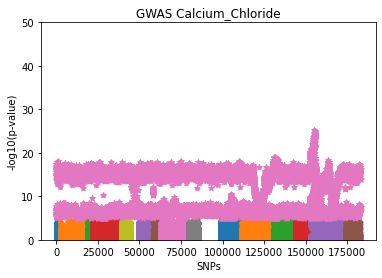

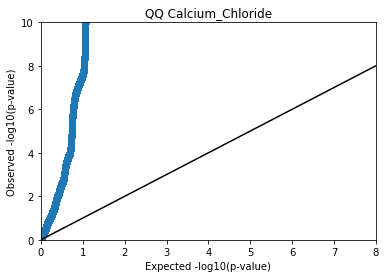

plink.P4.assoc.linear


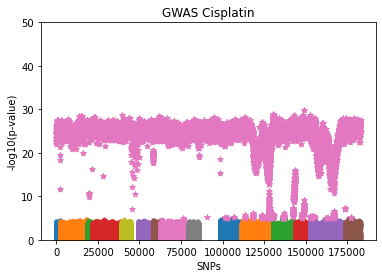

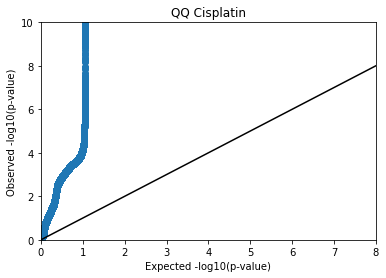

plink.P44.assoc.linear


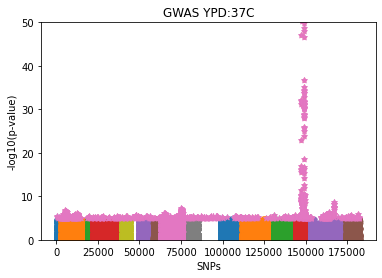

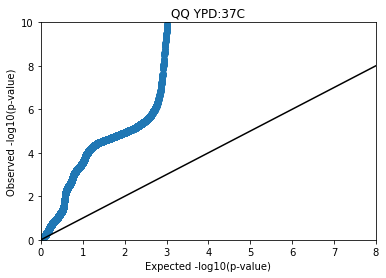

plink.P11.assoc.linear


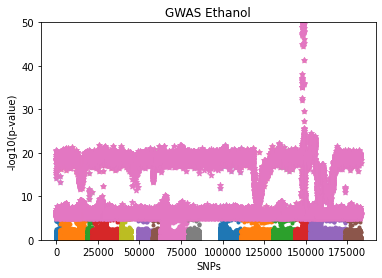

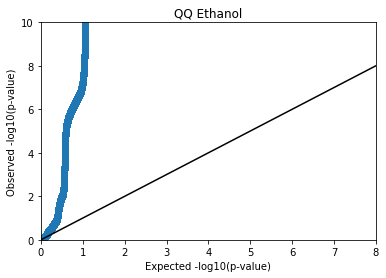

plink.P43.assoc.linear


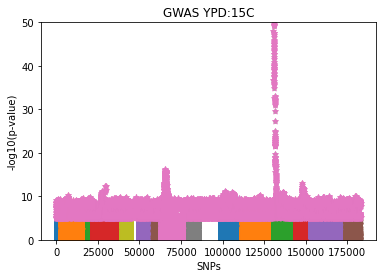

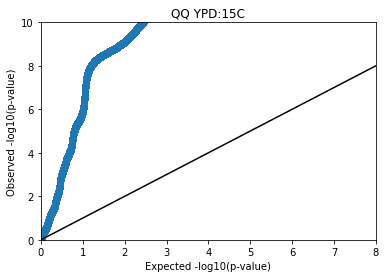

plink.P16.assoc.linear


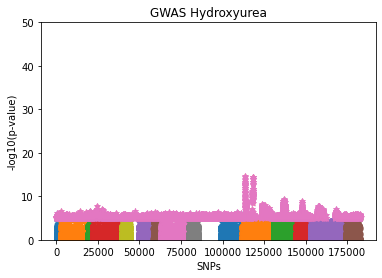

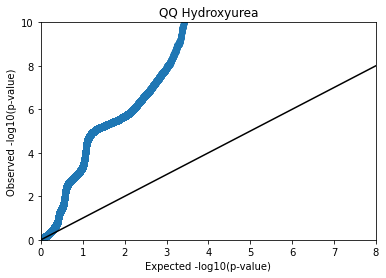

plink.P32.assoc.linear


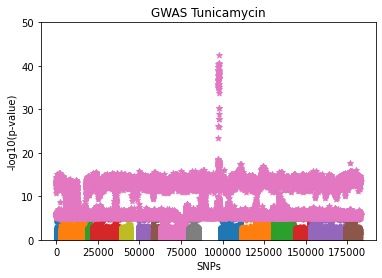

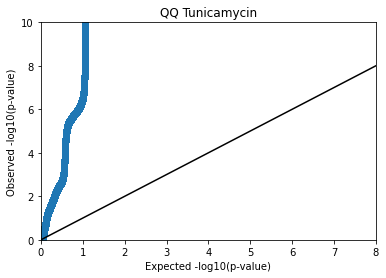

plink.P35.assoc.linear


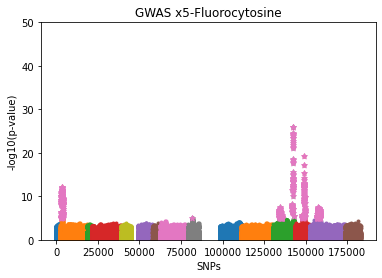

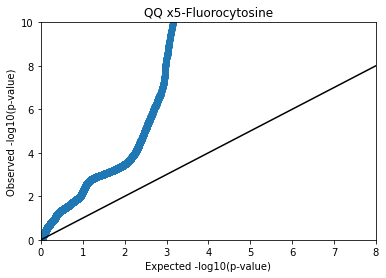

plink.P20.assoc.linear


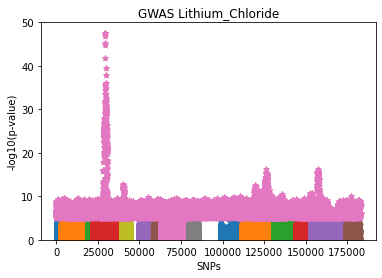

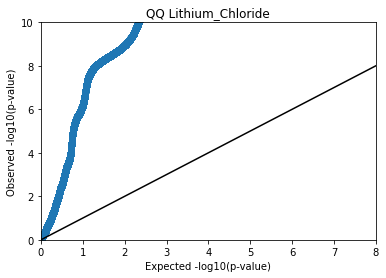

plink.P27.assoc.linear


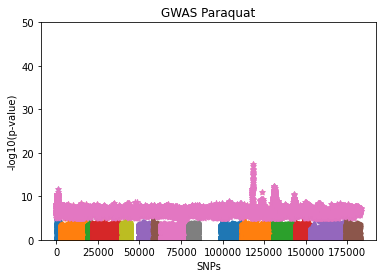

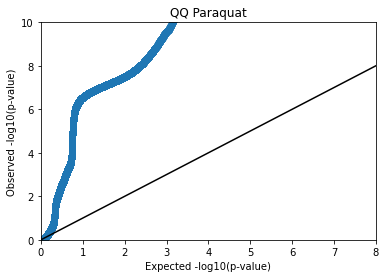

plink.P5.assoc.linear


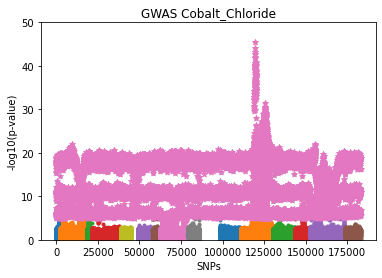

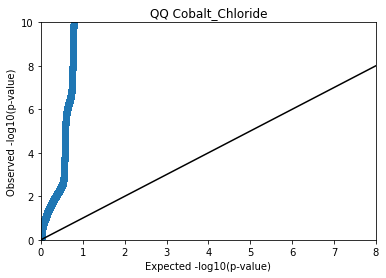

plink.P2.assoc.linear


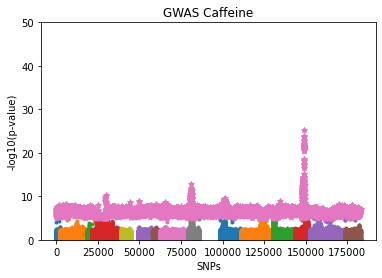

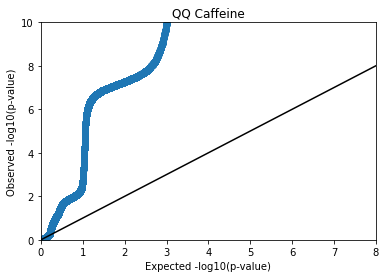

plink.P17.assoc.linear


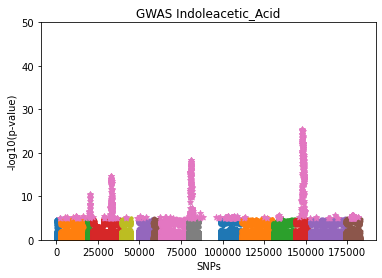

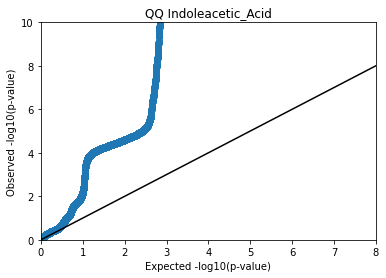

plink.P42.assoc.linear


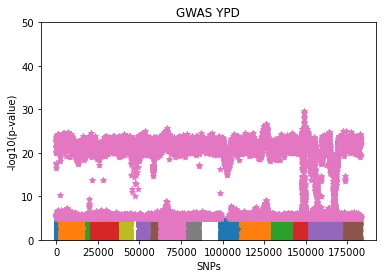

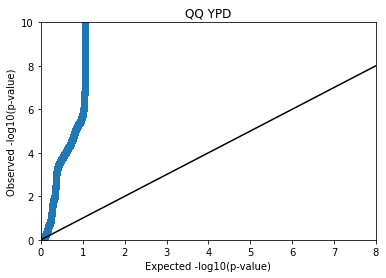

plink.P10.assoc.linear


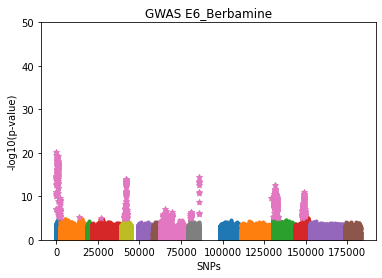

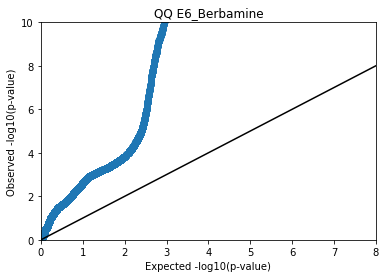

plink.P45.assoc.linear


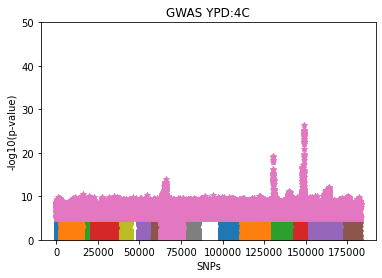

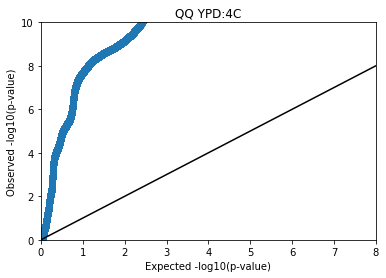

plink.P26.assoc.linear


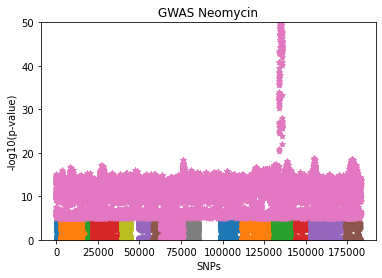

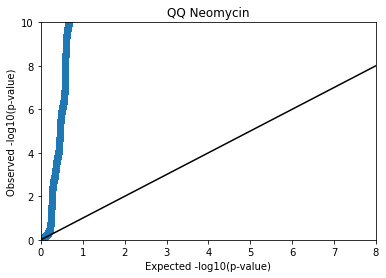

plink.P21.assoc.linear


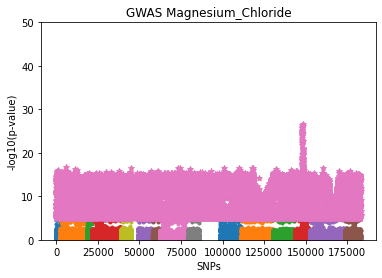

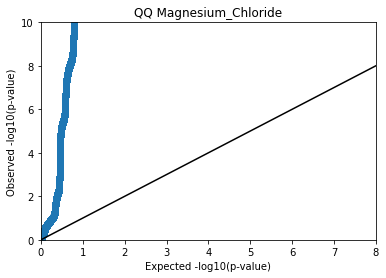

plink.P34.assoc.linear


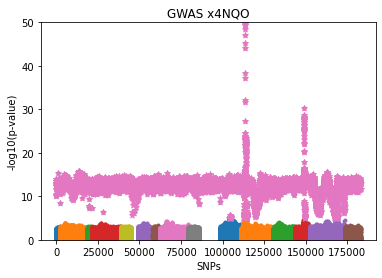

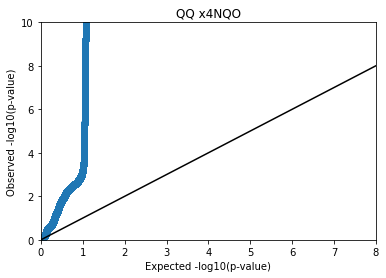

plink.P33.assoc.linear


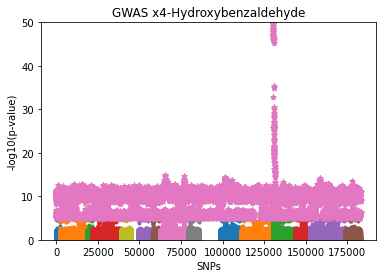

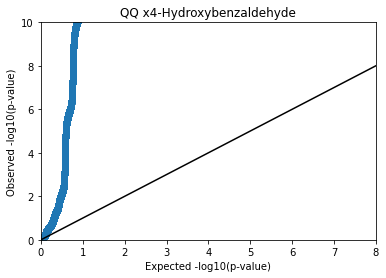

plink.P39.assoc.linear


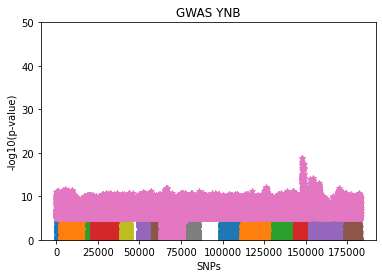

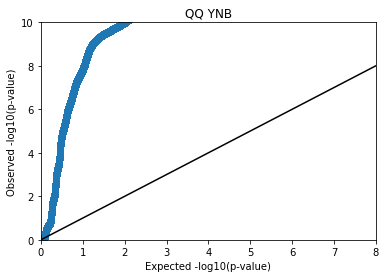

plink.P8.assoc.linear


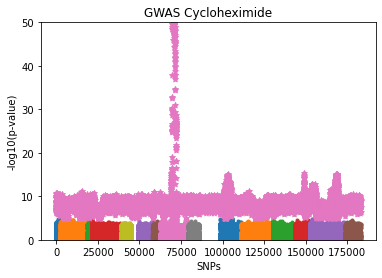

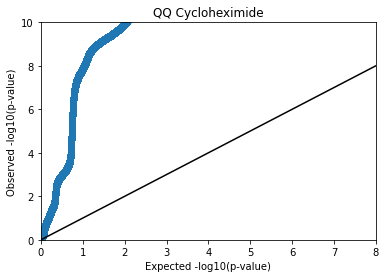

plink.P38.assoc.linear


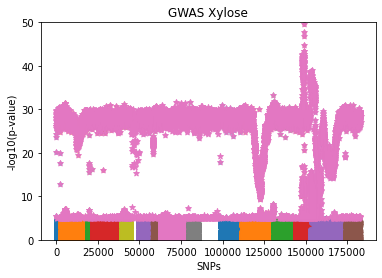

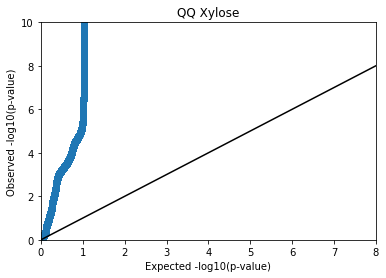

plink.P9.assoc.linear


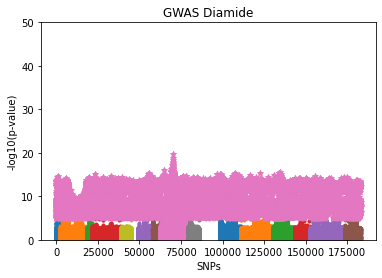

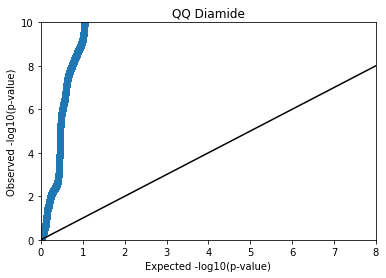

In [56]:
file = open('BYxRM_PhenoData.txt', 'r')

#extracting phenotype names from first line of file
for line in file:
    phenotypes = line.split('\t')
    phenotypes = phenotypes[1:]
    phenotypes[-1] =phenotypes[-1][:-1]
    break 
    
#initialize list to loop through to seperate chromosomes by color on Manhattan plot
chromosomes=["chrI","chrII","chrIII","chrIV","chrV","chrVI","chrVII","chrVIII","chrIX","chrX","chrXI","chrXII","chrXIII","chrXIV","chrXV","chrXVI"]

#using glob to iterate through assocation data 
for pathname in glob.iglob("*.assoc.linear"):
    #allow corresponding trait name to be called with 'pheno'
    print(pathname)
    start=pathname.index("P")
    end=pathname.index(".assoc")
    num=pathname[start+1:end]
    pheno=phenotypes[int(num)-1]
    
    #load assocation data in dataframe
    gwas = pd.read_csv(pathname, sep = "\s+")

    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    gwas['significant'] = np.where(gwas['logP']>5, True, False) #create p-value threshold in dataframe
    
    #plot Manhattan plots
    for chrom in chromosomes: 
        plt.scatter(gwas["snp_index"][gwas["CHR"] == chrom], gwas["logP"][gwas["CHR"] == chrom], marker = '.')
    #highlight SNPs with p-value < 10**-5
    plt.scatter(gwas["snp_index"][gwas["significant"]==True], gwas["logP"][gwas["significant"]==True], marker = '*') 

    plt.xlabel("SNPs")
    plt.ylabel("-log10(p-value)")
    plt.ylim(0, 50)
    plt.title("GWAS {}".format(pheno))
    plt.savefig("GWAS {}.png".format(pheno))
    plt.show()
    
    
    #sort gwas data 
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    
    #plot QQ
    plt.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    plt.plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    plt.title("QQ {}".format(pheno))
    plt.savefig("QQ {}.png".format(pheno))
    plt.show()
    

## Step 5: Boxplot for top associated SNP for Cadmium Chloride IC50

In [69]:
#sort to find top associated SNP for Cadmium Chloride IC50 
df = pd.read_csv("plink.P1.assoc.linear", sep = "\s+")
df['logP'] = -1 * np.log10(df['P'])
df_sorted = df.sort_values(by = "logP", ascending = False)

df_sorted
    

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP
18447,chrII,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057
18458,chrII,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588
18469,chrII,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065
18480,chrII,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208
18513,chrII,.,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409
...,...,...,...,...,...,...,...,...,...,...
182089,chrXVI,.,890346,T,COV6,673,NaN,NaN,NaN,NaN
182090,chrXVI,.,890346,T,COV7,673,NaN,NaN,NaN,NaN
182091,chrXVI,.,890346,T,COV8,673,NaN,NaN,NaN,NaN
182092,chrXVI,.,890346,T,COV9,673,NaN,NaN,NaN,NaN


In [75]:
genotypes_file = open("BYxRM_segs_saccer3.bam.simplified.vcf")

snp_genotypes = []

#loading genotypes into list
for line in genotypes_file:
    if "chrII" and "795756" in line: #SNP of interest
        record = line.split("GT:DP")
        samples = record[1].split('\t')
        for genotype in samples[1:]:
            if '0/0' in genotype:
                snp_genotypes.append('ref_homo')
            elif '0/1' in genotype:
                snp_genotypes.append('het')
            elif '1/1' in genotype:
                snp_genotypes.append('alt_homo')
            elif './.' in genotype:
                snp_genotypes.append('skip')
                
genotypes_file.close()

#initialize phenotype dictionary 
phen_dict = {}
phen_dict['ref_homo']=[]
phen_dict['het']=[]
phen_dict['alt_homo']=[]
phen_dict['skip']=[]
phenotypes=open('BYxRM_PhenoData.txt')
count =0 

#link phenotypes to genotypes and add to lists in dictionary
for line in phenotypes:
    if "Cadmium" in line: #skip header
        pass
    else:
        phen =line.split('\t')
        cadmium = phen[1]
        category = snp_genotypes[count]
        if cadmium == 'NA':
            pass
        else:
            phen_dict[category].append(float(cadmium))
        count+=1
phenotypes.close
            


<function TextIOWrapper.close>

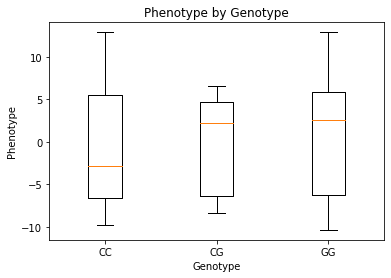

In [89]:
#plot boxplot
data = list(phenotype_dict.values())

plt.boxplot(data[:3], labels = ("CC", "CG", "GG"))
plt.title("Phenotype by Genotype")
plt.xlabel("Genotype")
plt.ylabel("Phenotype")
plt.savefig("Boxplot.png")